# Recursion and memoization
Today, we will talk about a really neat way to speed up recursive algorithms, called memoization.

# Slow fibonacci

Recall the fibonacci function you saw before:

In [3]:
def fib(n):
    '''Slow fibonacci computation'''
    if n < 2:
        return n
    return fib(n-1) + fib(n-2)

for i in range(8):
    print(fib(i))

0
1
1
2
3
5
8
13


In [9]:
fib(34) # that's kinda slow

5702887

In [ ]:
# This cell would take centuries to run! 
fib(100)  
# Try running it but press Ctrl+C or the stop button to abort

In [50]:
call_counts = {}  # Count how many times we called fibonacci(i) 

def fib(n):
    '''Fibonacci where we count how many calls were made'''
    if n in call_counts:
        call_counts[n] += 1
    else: # not in dictionary, initialize to 1
        call_counts[n] = 1
    if n < 2:
        return n
    return fib(n-1) + fib(n-2)

fib(32)
call_counts

{32: 1,
 31: 1,
 30: 2,
 29: 3,
 28: 5,
 27: 8,
 26: 13,
 25: 21,
 24: 34,
 23: 55,
 22: 89,
 21: 144,
 20: 233,
 19: 377,
 18: 610,
 17: 987,
 16: 1597,
 15: 2584,
 14: 4181,
 13: 6765,
 12: 10946,
 11: 17711,
 10: 28657,
 9: 46368,
 8: 75025,
 7: 121393,
 6: 196418,
 5: 317811,
 4: 514229,
 3: 832040,
 2: 1346269,
 1: 2178309,
 0: 1346269}

In computing `fib(32)`, the computer recomputed `fib(30)` twice and `fib(0)` more than 1 million times (1,346,269 times to be precise)! How silly!
That is happening because `fib(32)` calls `fib(30)` directly and `fib(31)` which calls `fib(30)` *again*, and then they all  call `fib(29)`. (Curious how the number of calls looks like a Fibonacci sequence itself.) 

Python is dumb in ways people aren't. It will recompute `fib(17)` hundreds of times.

Anyway, this suggests a nice simple idea. 



# Memoize
Instead of just counting how many calls we make, let's save time and use our dictionary to remember the answers. That way, we never have to call `fib` more than once on the same input! 

Were's the "r"? Whoeve inveted memoization needs to lean to spell bette.

In [47]:
fib_memory = {}   # using "global variables" like this is not a great programming practice

def fib_memo(n):
    '''Compute fibonacci number if not already in memory'''
    if n in fib_memory:  
        return fib_memory[n]
    if n < 2:
        ans = n
    else:
        ans = fib_memo(n - 1) + fib_memo(n - 2)
    fib_memory[n] = ans
    return ans
    
print(fib_memo(10))
print(fib_memory)

55
{1: 1, 0: 0, 2: 1, 3: 2, 4: 3, 5: 5, 6: 8, 7: 13, 8: 21, 9: 34, 10: 55}


In [14]:
fib_memo(100) # no sweat!

354224848179261915075

In [15]:
fib_memo(1000)  # well that was fast!

43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875

# Automatic memoization!

In python we can automate this step using a function that takes a function as input and returns a new function as 
output. That may sound crazy, but it works! We will create a memoize function that remembers the answers
for *any* function.

Save this code somewhere in case you want to use it later.

In [2]:
def memoize(func):
    '''Remember the values of a function func'''
    memory = {}  # the memory dictionary -- this is a better style than a global variable 
    def helper(*args):
            key = str(args)  # convert the function inputs to a string so it can work on any input
            if key in memory:
                return memory[key]
            ans = func(*args)
            memory[key] = ans 
            return ans
    helper.memory = memory  # so we can access it later
    return helper

In [54]:
# It's easy to create a memoized version of the fibonacci function.
# We can use it to speed up the slow recurisve fib function above.
fib = memoize(fib) 

# now let's try again
fib(100)

354224848179261915075

In [52]:
# run this if you want to see the contents of the memory
fib.memory

{'(1,)': 1,
 '(0,)': 0,
 '(2,)': 1,
 '(3,)': 2,
 '(4,)': 3,
 '(5,)': 5,
 '(6,)': 8,
 '(7,)': 13,
 '(8,)': 21,
 '(9,)': 34,
 '(10,)': 55,
 '(11,)': 89,
 '(12,)': 144,
 '(13,)': 233,
 '(14,)': 377,
 '(15,)': 610,
 '(16,)': 987,
 '(17,)': 1597,
 '(18,)': 2584,
 '(19,)': 4181,
 '(20,)': 6765,
 '(21,)': 10946,
 '(22,)': 17711,
 '(23,)': 28657,
 '(24,)': 46368,
 '(25,)': 75025,
 '(26,)': 121393,
 '(27,)': 196418,
 '(28,)': 317811,
 '(29,)': 514229,
 '(30,)': 832040,
 '(31,)': 1346269,
 '(32,)': 2178309,
 '(33,)': 3524578,
 '(34,)': 5702887,
 '(35,)': 9227465,
 '(36,)': 14930352,
 '(37,)': 24157817,
 '(38,)': 39088169,
 '(39,)': 63245986,
 '(40,)': 102334155,
 '(41,)': 165580141,
 '(42,)': 267914296,
 '(43,)': 433494437,
 '(44,)': 701408733,
 '(45,)': 1134903170,
 '(46,)': 1836311903,
 '(47,)': 2971215073,
 '(48,)': 4807526976,
 '(49,)': 7778742049,
 '(50,)': 12586269025,
 '(51,)': 20365011074,
 '(52,)': 32951280099,
 '(53,)': 53316291173,
 '(54,)': 86267571272,
 '(55,)': 139583862445,
 '(56,

# Decorative Memoization

Python provides a shortcut to defining `fib` and `fib = memoize(fib)` in one step. This is what is illustrated below.


In [55]:

@memoize
def pretty_fib(n):
    '''Fibonacci number'''
    if n < 2:
        return n
    return pretty_fib(n-1) + pretty_fib(n-2)

pretty_fib(100)  # fast, and no need to create a separate dictionary

354224848179261915075

Now, let's apply this to a more complicated and more interesting problem.
# 🆕  It's time for change... let's invent a new coin! 💰

How to choose how much the new coin is worth❓

Let $c(n, S)$ be the number of coins needed to make $n$ dollars using values in set $S$. 

For example, using Jamaican coins, $c(99, \{1, 5, 10, 20\}) = 10$ because 
$$   💲 99 = \underbrace{20 + 20 + 20 + 20 + 10 + 5 + 1 + 1 + 1 + 1}_{10}.$$

Now, if they added a 3 dollar coin, then this would go down to
$c(99, \{1, 3, 5, 10, 20\}) = 8$ because
$$   💲 99 = \underbrace{20 + 20 + 20 + 20 + 10 + 3 + 3 + 3}_{8}.$$

The **most coins needed** $m(S)$ for a set of coins $S$ is defined to be:
$$m(S)=\max \bigl\{ c(1, S), c(2, S), \ldots, c(99, S)\bigr\}.$$
This is the most coins you would need to create any amount between 1...99. We know that $$m(\{1,5,10,20\}) \ge c(99, \{1, 5, 10, 20\}) = 10.$$ Is 10 the maximum needed Jamaican coins?

Our goal during this lecture is to see what new coin value $\nu$ we can add to minimize $m(\{1, 5, 10, 20, \nu\})$, to reduce the most number of coins we might need to make any amount below 100.

I made up this problem for you today, so we will discover the answer together. What value you think is best? Coming up with new problems and solving them gives you a taste of what **research in Computer Science** is like.

## Unit test

Start with the test? A good way to start coding is to create a unit test. Don't worry, this isn't a test for you. It's a test for your program, and you get to write it. It's called a unit test because it tests a single unit of code.

The first function we are going to make is a function that finds gives change in Jamaican coins, using as few coins as possible.

In [33]:
# Let's make a fun make_jam_change, specific to [1, 5, 10, 20]
# It's a good idea to first make a "unit test" that tests it out
def test_make_jam_change():
  assert make_jam_change(1) == [1]
  assert make_jam_change(7) == [5, 1, 1]
  assert make_jam_change(99) == [20, 20, 20, 20, 10, 5, 1, 1, 1, 1]
  print("All make_jam_change tests passed! 💰")

In [34]:
def make_jam_change(n):  # uses a "greedy" approach
  '''Find a list of change using Jamaican coins [20, 10, 5, 1] to make $n
  The answer should be a minimal list of coins, sorted in decreasing order'''
  ans = []
  while n >= 20:
    ans.append(20)
    n -= 20
  while n >= 10:
    ans.append(10)
    n -= 10
  while n >= 5:
    ans.append(5)
    n -= 10
  while n >= 1:
    ans.append(1)
    n -= 1
  return ans

test_make_jam_change()

AssertionError: 

Oops, it's easy to make mistakes when copying/pasting. Can you spot the typo above? Below is the better way.

In [35]:
def make_jam_change(n): 
  '''Find a list of change using Jamaican coins [20, 10, 5, 1] to make $n
  The answer should be a minimal list of coins, sorted in decreasing order'''
  ans = []
  for coin in [20, 10, 5, 1]:  # DRY = Don't Repeat Yourself! and fewer bugs
    while n >= coin:
      ans.append(coin)
      n -= coin
  return ans

test_make_jam_change()

All make_jam_change tests passed! 💰


In [36]:
# Let's consider the harder and more general case of an arbitrary set of coins!

def test_make_change():
  '''Check that make_change finds the fewest coins needed to make $n using the given list. 
  Its answer should be a decreasing (non-increasing) list, but its input can be unsorted'''
  assert make_change(17, [20, 10, 5, 1]) == [10, 5, 1, 1]
  assert make_change(8, [20, 10, 5, 4, 1]) == [4, 4] 
  assert make_change(9, [1, 4, 5, 10, 20]) == [5, 4] 
  assert make_change(0, [20, 10, 5, 1]) == []
  assert make_change(99, [20, 10, 5, 1]) == [20, 20, 20, 20, 10, 5, 1, 1, 1, 1] 
  assert make_change(99, [25, 10, 5, 1]) == [25, 25, 25, 10, 10, 1, 1, 1, 1] # USA
  print("All tests passed for make_change!")

In [37]:
def make_change(n, coins):  
  '''Find a list of change using arbitrary coins [20, 10, 5, 1] to make $n
  The answer should be a minimal list of coins, sorted in decreasing order'''
  decreasing_coins = sorted(coins, reverse=True)  # sort in decreasing order
  ans = []
  for coin in decreasing_coins: 
    while n >= coin:
      ans.append(coin)
      n -= coin
  return ans

test_make_change()  

AssertionError: 

In [38]:
make_change(8, [20, 10, 5, 4, 1])

[5, 1, 1, 1]

Our algorithm was greedy--it started with a 5-dollar coin, but the best way to make change for 8 dollars is two 4-dollar coins if you have them.

# 🤔 ✍ 

The whiteboard is the best place to think about how to solve problems.

## Recursion to the rescue!

In [82]:
def make_change(n, coins): # Idea: use recursion!  
  if n == 0:
    return []
  ans = -1
  for coin in coins:
    if n >= coin:
      possibility = [coin] + make_change(n - coin, coins)
      if ans == -1 or len(possibility) < len(ans):
        ans = possibility
  ans.sort(reverse=True)
  return ans

make_change(8, [20, 10, 5, 4, 1])

# try pasting this code in at pythontutor.com to see how it works!

[4, 4]

In [ ]:
# this cell takes too long to run!
test_make_change()

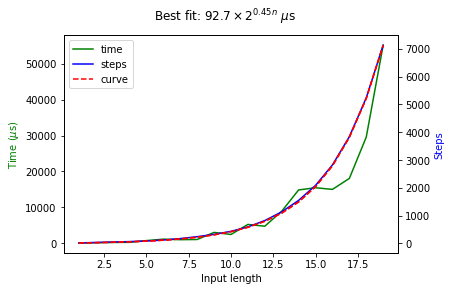

In [ ]:
# Don run this cell--it's magic we use to estimate how long it would take to run
%run boaz_utils.ipynb
inputs = [[i, [20, 10, 5, 1]] for i in range(1, 20)]
(curve,lengths,times,steps,outputs) = timer(make_change,inputs,inlen=lambda pair: pair[0], doplot_logscale=False)

In [39]:
microseconds = 92.7 * 2 ** (0.45 * 99) 
seconds = microseconds / 1_000_000
years = seconds / 365 / 24 / 60 / 60
print(f"On n=99, it would take about {years:.2f} years to compute change for $99!")

On n=99, it would take about 75.71 years to compute change for $99!


In [84]:
# Let's use our memoize function 
make_change = memoize(make_change)

Or we could have done it all at once by just writing

```python
@memoize
def make_change(n, coins): # Idea: use recursion!  
  if n == 0:
    return []
  ans = -1
  for coin in coins:
    if n >= coin:
      possibility = [coin] + make_change(n - coin, coins)
      if ans == -1 or len(possibility) < len(ans):
        ans = possibility
  ans.sort(reverse=True)
  return ans

```

In [85]:
make_change(99, [20, 10, 5, 1])  # let's see how fast it is!

[20, 20, 20, 20, 10, 5, 1, 1, 1, 1]

In [86]:
make_change.memory

{'(0, [20, 10, 5, 1])': [],
 '(1, [20, 10, 5, 1])': [1],
 '(2, [20, 10, 5, 1])': [1, 1],
 '(3, [20, 10, 5, 1])': [1, 1, 1],
 '(4, [20, 10, 5, 1])': [1, 1, 1, 1],
 '(5, [20, 10, 5, 1])': [5],
 '(6, [20, 10, 5, 1])': [5, 1],
 '(7, [20, 10, 5, 1])': [5, 1, 1],
 '(8, [20, 10, 5, 1])': [5, 1, 1, 1],
 '(9, [20, 10, 5, 1])': [5, 1, 1, 1, 1],
 '(10, [20, 10, 5, 1])': [10],
 '(11, [20, 10, 5, 1])': [10, 1],
 '(12, [20, 10, 5, 1])': [10, 1, 1],
 '(13, [20, 10, 5, 1])': [10, 1, 1, 1],
 '(14, [20, 10, 5, 1])': [10, 1, 1, 1, 1],
 '(15, [20, 10, 5, 1])': [10, 5],
 '(16, [20, 10, 5, 1])': [10, 5, 1],
 '(17, [20, 10, 5, 1])': [10, 5, 1, 1],
 '(18, [20, 10, 5, 1])': [10, 5, 1, 1, 1],
 '(19, [20, 10, 5, 1])': [10, 5, 1, 1, 1, 1],
 '(20, [20, 10, 5, 1])': [20],
 '(21, [20, 10, 5, 1])': [20, 1],
 '(22, [20, 10, 5, 1])': [20, 1, 1],
 '(23, [20, 10, 5, 1])': [20, 1, 1, 1],
 '(24, [20, 10, 5, 1])': [20, 1, 1, 1, 1],
 '(25, [20, 10, 5, 1])': [20, 5],
 '(26, [20, 10, 5, 1])': [20, 5, 1],
 '(27, [20, 10, 5, 1])

In [87]:
test_make_change()

All tests passed for make_change!


In [73]:
def most_coins_needed(max_val, coins):
  '''Compute the maximum number of coins needed to make change for 1...max_val using the given coins'''
  ans = 0
  for n in range(1, max_val + 1):
    change = make_change(n, coins)
    if len(change) > ans:
      # print("Found a worse case:", n, change)
      ans = len(change)
  return ans

most_coins_needed(100, [1, 5, 10, 20])

10

In [74]:
for new_coin in range(1, 100):
  print(new_coin, most_coins_needed(100, [1, 5, 10, 20, new_coin]))

1 10
2 8
3 8
4 8
5 10
6 8
7 7
8 7
9 7
10 10
11 8
12 7
13 7
14 7
15 9
16 7
17 6
18 6
19 6
20 10
21 6
22 6
23 6
24 6
25 8
26 6
27 6
28 6
29 7
30 8
31 6
32 6
33 6
34 7
35 8
36 6
37 6
38 6
39 8
40 8
41 7
42 7
43 7
44 7
45 8
46 7
47 7
48 7
49 8
50 8
51 7
52 7
53 7
54 8
55 8
56 7
57 7
58 8
59 8
60 8
61 8
62 8
63 8
64 8
65 8
66 8
67 8
68 8
69 8
70 8
71 8
72 8
73 8
74 8
75 8
76 8
77 8
78 8
79 8
80 9
81 9
82 9
83 9
84 9
85 9
86 9
87 9
88 9
89 9
90 9
91 9
92 9
93 9
94 9
95 9
96 9
97 9
98 9
99 9


In [77]:
def best_coin(max_val, coins):
  best_coin = -1
  best_score = -1
  for new_coin in range(1, max_val+1):
    new_coins = coins + [new_coin]
    score = most_coins_needed(max_val, new_coins)
    if best_coin == -1 or score < best_score:
      best_coin = new_coin
      best_score = score
      print("Found a new best coin", best_coin, "with worst case", best_score)
  return best_coin

best_coin(100, [1, 5, 10, 20])

Found a new best coin 1 with worst case 10
Found a new best coin 2 with worst case 8
Found a new best coin 7 with worst case 7
Found a new best coin 17 with worst case 6


17

# 🙀 OMG didn't expect that!

In [78]:
best_coin(50, [1, 5, 10, 20]) # what if we only go up to 50

Found a new best coin 1 with worst case 7
Found a new best coin 2 with worst case 5
Found a new best coin 9 with worst case 4


9

In [79]:
best_coin(100, [1, 5, 10, 25]) # what about in the USA?

Found a new best coin 1 with worst case 9
Found a new best coin 2 with worst case 7
Found a new best coin 12 with worst case 6


12

In [ ]:
scored_pairs = [[most_coins_needed(100, [1, 5, 10, 20, new_coin]), new_coin] for new_coin in range(1, 101)]
scored_pairs.sort()
scored_pairs

[[6, 17],
 [6, 18],
 [6, 19],
 [6, 21],
 [6, 22],
 [6, 23],
 [6, 24],
 [6, 26],
 [6, 27],
 [6, 28],
 [6, 31],
 [6, 32],
 [6, 33],
 [6, 36],
 [6, 37],
 [6, 38],
 [7, 7],
 [7, 8],
 [7, 9],
 [7, 12],
 [7, 13],
 [7, 14],
 [7, 16],
 [7, 29],
 [7, 34],
 [7, 41],
 [7, 42],
 [7, 43],
 [7, 44],
 [7, 46],
 [7, 47],
 [7, 48],
 [7, 51],
 [7, 52],
 [7, 53],
 [7, 56],
 [7, 57],
 [8, 2],
 [8, 3],
 [8, 4],
 [8, 6],
 [8, 11],
 [8, 25],
 [8, 30],
 [8, 35],
 [8, 39],
 [8, 40],
 [8, 45],
 [8, 49],
 [8, 50],
 [8, 54],
 [8, 55],
 [8, 58],
 [8, 59],
 [8, 60],
 [8, 61],
 [8, 62],
 [8, 63],
 [8, 64],
 [8, 65],
 [8, 66],
 [8, 67],
 [8, 68],
 [8, 69],
 [8, 70],
 [8, 71],
 [8, 72],
 [8, 73],
 [8, 74],
 [8, 75],
 [8, 76],
 [8, 77],
 [8, 78],
 [8, 79],
 [9, 15],
 [9, 80],
 [9, 81],
 [9, 82],
 [9, 83],
 [9, 84],
 [9, 85],
 [9, 86],
 [9, 87],
 [9, 88],
 [9, 89],
 [9, 90],
 [9, 91],
 [9, 92],
 [9, 93],
 [9, 94],
 [9, 95],
 [9, 96],
 [9, 97],
 [9, 98],
 [9, 99],
 [10, 1],
 [10, 5],
 [10, 10],
 [10, 20],
 [10, 100]]

In [109]:
# As you get more experienced with programming, you may be able to write shorter code to solve puzzles like this:
scored_pairs = []
for new_coin in range(2, 100):
    coins = [1, 5, 10, 20, new_coin]
    num_needed = [0]  # just memoize the number of coins, not the actual change
    for n in range(1, 100):  # loop over values instead of recursion
        num_needed.append(min(1 + num_needed[n - c] for c in coins if c <= n))
    scored_pairs.append([max(num_needed), new_coin])  # max(num_needed) is the worst case
print("[worst case num of coins, best coin] =", min(scored_pairs))

[worst case num of coins, best coin] = [6, 17]


## Bonus question

What coin minimizes the **average** number of coins for change? Note, the best average is only **3.57** coins 
on average to make change for a value in [0, 1, 2, ..., 99].

# Another example: number of ways to sum up to an integer

Let ```num_sums(n)``` be the number of ways to write a positive integer ```n``` as the sum
of positive integers. For example, there are ```8``` ways of writing ```4```: ```1 + 1 + 1 + 1, 2 + 1 + 1, 1 + 2 + 1, 1 + 1 + 2, 2 + 2, 1 + 3, 3 + 1```, and ```4```. Jamar conjectured that ```num_sums(n)``` = $2^{n−1}$, but he wanted to write a program to test his conjecture because [some conjectures fail only for large numbers](https://www.maa.org/sites/default/files/pdf/upload_library/22/Ford/Guy697-712.pdf)!

In [112]:
@memoize  # this makes it fast! try running with and without it.
def num_sums(n):
    ans = 1  # for just writing n as n itself
    for i in range(1, n):
        # try the first number in sum being i, then the remaining part must sum to n-i
        ans += num_sums(n-i)
    return ans

In [113]:
def test_num_sums():
    assert num_sums(1) == 1  # 1
    assert num_sums(2) == 2  # 1 + 1, 2
    assert num_sums(3) == 4  # 1 + 1 + 1, 2 + 1, 1 + 2, 3
    assert num_sums(4) == 8  
    print("All tests for num_sums passed!")

test_num_sums()

All tests for num_sums passed!


In [114]:
num_sums(100)  # fast!

633825300114114700748351602688

In [115]:
for i in range(1, 1000):
    assert num_sums(i) == 2 ** (i-1)

print("Jamar's conjecture holds up to 1000!")

Jamar's conjecture holds up to 1000!


#  Number of different sums

A wise person named Tyler once said that, for many problems, the challenge is figuring out how to write 
the recurisve function in the first place. Let's next think of computing a function `num_different_sums(n)`

What if we want to compute a function `num_different_sums(n)` which doesn’t differentiate between different orderings of the same sum? For example, it treats ```1 + 1 + 2``` and ```2 + 1 + 1``` as the same sum. So, there would only be ```5``` ways to sum up to the number ```4```: ```1 + 1 + 1 + 1, 2 + 1 + 1, 2 + 2, 3 + 1, 4```.

**Question**: How shall we write a recursive function for num_different_sums? 

The issue is that we could think of one term in the sum $t$ and then count the number of ways to make $n-t$, but that's
what we did in our last problem and that would count all ordering. 

**Answer**: The trick will be to write the terms in the sum in 
decreasing order like we have above and solve the seemingly harder (but actually easier) problem of finding how
many ways there are to add up to $n$ when the largest term is $\le m$.

In [116]:
def test_num_different_sums():
    assert num_different_sums(1) == 1
    assert num_different_sums(2) == 2  # 1 + 1, 2
    assert num_different_sums(3) == 3  # 1 + 1 + 1, 1 + 2, 3
    assert num_different_sums(4) == 5  # 1 + 1 + 1 + 1, 1 + 2 + 2, 2 + 2, 1 + 3, 4
    print("All tests for num_different_sums passed!")

In [14]:
@memoize  # makes it fast, try with and without it
def helper(n, m):
    '''how many ways are there to sum up to n in decreasing order, where the biggest term is at most m'''    
    range_top = min(m, n)  # we will only go up to n-1 or m-1, whichever is smaller
    ans = 1 # for n = n itself, not included in the above
    for i in range(1, range_top):  
        ans += helper(n - i, i)
    return ans

In [15]:
helper(3, 3)

3

In [16]:
helper(3, 2)

2

In [17]:
helper(3, 1)

1

In [18]:
helper.memory  # it remembers the values for all pairs of n and m

{'(2, 1)': 1, '(1, 2)': 1, '(3, 3)': 3, '(3, 2)': 2, '(3, 1)': 1}

In [20]:
def num_different_sums(n):
    return helper(n, n)

assert num_different_sums(1) == 1
assert num_different_sums(2) == 2  # 1 + 1, 2
assert num_different_sums(3) == 3  # 1 + 1 + 1, 1 + 2, 3
assert num_different_sums(4) == 5  # 1 + 1 + 1 + 1, 1 + 2 + 2, 2 + 2, 1 + 3, 4
print("All tests for num_different_sums passed!")

All tests for num_different_sums passed!


In [23]:
# sure looks like Fibonacci, let's check it out

for i in range(10):
    print(num_different_sums(i))

1
1
2
3
5
7
10
14
19
25


See what we said: not all conjectures that seem to work for small numbers work out!

# Extra problem: Longest Increasing Subsequence

We didn't get to it in lecture, but I include it in case you're interested.

This is a "classic job interview problem." Given a sequence of integers, find the longest increasing subsequence.

Let's first make our unit test. That will help us think through some of the hard cases.

In [27]:
def test_longest_inc():  # start with a unit test
    assert longest_inc([1,2,3,4,6,0,1,2,3,4,5,6]) == 7
    assert longest_inc([1,0,3,2,5,4,5]) == 4
    assert longest_inc([]) == 0
    print("All longest_inc tests passed")

Next, we define a recursive algorithm. Think about it. This is hard! The reason is that even if we knew all the lengths of the longest increasing subsequences of its prefixes, we wouldn't know the length of the longest increasing subsequence because we don't know the largest elements in each of these sequences...

To solve it, let's define an easier problem: the longest increasing subsequence that includes the last element of the sequence. This is easier to make recursive.

In [28]:
@memoize  # note the memoize goes here
def longest_inc_end(seq):
    '''Find the length of the longest increasing subsequence in 
    seq that includes the last element'''
    if len(seq) == 0:
        return 0
    best = 1  # could just be the sequence [seq[-1]]
    for i in range(len(seq) - 1):
        if seq[i] < seq[-1]:
            best = max(longest_inc_end(seq[:i + 1]) + 1, best)
    return best
    
# try moving the @memoize to here, does it work fast?
def longest_inc(seq):
    '''Find the longest increasing subsequence of seq.'''
    best = 0
    for i in range(len(seq)):
        best = max(longest_inc_end(seq[:i + 1]), best)
    return best

test_longest_inc()

All longest_inc tests passed


In [30]:
# Note that without the @memoize above, it would take about 20,000 years to run this cell!
alternating = [1,0]
for i in range(100):
    alternating.append(alternating[i-2] + 2)
print(alternating)
longest_inc(alternating)

[1, 0, 3, 5, 3, 2, 5, 7, 5, 4, 7, 9, 7, 6, 9, 11, 9, 8, 11, 13, 11, 10, 13, 15, 13, 12, 15, 17, 15, 14, 17, 19, 17, 16, 19, 21, 19, 18, 21, 23, 21, 20, 23, 25, 23, 22, 25, 27, 25, 24, 27, 29, 27, 26, 29, 31, 29, 28, 31, 33, 31, 30, 33, 35, 33, 32, 35, 37, 35, 34, 37, 39, 37, 36, 39, 41, 39, 38, 41, 43, 41, 40, 43, 45, 43, 42, 45, 47, 45, 44, 47, 49, 47, 46, 49, 51, 49, 48, 51, 53, 51, 50]


27